# Nettoyage des données

Importation des libraires

In [119]:
import pandas as pd
import os
import time

Importation des données issues des fichiers excel

In [5]:
data = pd.DataFrame()

dir_path = "row_data/"

files = []

for file in os.listdir(dir_path):
    filename = os.fsdecode(file)
    if filename.endswith(".xlsx"):
       files.append(dir_path+filename)

data = pd.read_excel(dir_path+filename)
files.remove(dir_path+filename)

In [6]:
for f in files:
    newdata = pd.read_excel(f)
    data = data.append(newdata)

Sauvegarde sous fichier CSV des données brutes

In [7]:
data.to_csv("data_row")

# Processing des données

In [37]:
data.head()

,Unnamed: 0,CAB,Date de passage,Date de sortie,Emetteur,Code Regate Emetteur,Destination,Code Regate Destinataire,Produit,Traitement,Code traitement,Contenant,Injecteur,Sortie,Rejet,CAB fonctionnel,CBN
0,0,2013373309901180821911226030,2019-03-01 06:01:13,2019-03-01 06:01:59,BORDEAUX PIC,337330,TRI MANUEL 2,990118,LETTRE,TRI MANUEL TG2,26.0,ké7,11.0,37,NON,-01------99011808------26-30,non trouvé
1,1,2223131703373300302930351003,2019-03-01 06:09:37,2019-03-01 06:09:37,MIDI PYRENEES PIC,313170,BORDEAUX PIC,337330,ECOPLI,TRI MECA TG3,51.0,bak,NaN,MTIGF01,NON,-22------33733003------51-03,0 05
2,2,2223131703373300302940751003,2019-03-01 06:09:40,2019-03-01 06:09:40,MIDI PYRENEES PIC,313170,BORDEAUX PIC,337330,ECOPLI,TRI MECA TG3,51.0,bak,NaN,MTIGF01,NON,-22------33733003------51-03,0 05
3,3,2223131703373300302936951003,2019-03-01 06:09:45,2019-03-01 06:09:45,MIDI PYRENEES PIC,313170,BORDEAUX PIC,337330,ECOPLI,TRI MECA TG3,51.0,bak,NaN,MTIGF01,NON,-22------33733003------51-03,0 05
4,4,2223131703373300302924251003,2019-03-01 06:09:48,2019-03-01 06:09:48,MIDI PYRENEES PIC,313170,BORDEAUX PIC,337330,ECOPLI,TRI MECA TG3,51.0,bak,NaN,MTIGF01,NON,-22------33733003------51-03,0 05


On enlève les colonnes inutiles

In [38]:
data.columns

Index(['Unnamed: 0', 'CAB', 'Date de passage', 'Date de sortie', 'Emetteur',
       'Code Regate Emetteur', 'Destination', 'Code Regate Destinataire',
       'Produit', 'Traitement', 'Code traitement', 'Contenant', 'Injecteur',
       'Sortie', 'Rejet', 'CAB fonctionnel', 'CBN'],
      dtype='object')

In [39]:
col_drop = ['CAB', 'Date de sortie', 'Emetteur',
       'Code Regate Emetteur', 'Destination', 'Code Regate Destinataire',
       'Produit', 'Traitement', 'Code traitement', 'Contenant', 'Injecteur',
       'Sortie', 'Rejet', 'CAB fonctionnel']

data.drop(columns=col_drop, inplace=True)

In [40]:
data.head()

,Date de passage,CBN
0,2019-03-01 06:01:13,non trouvé
1,2019-03-01 06:09:37,0 05
2,2019-03-01 06:09:40,0 05
3,2019-03-01 06:09:45,0 05
4,2019-03-01 06:09:48,0 05


On enlève les colonnes CBN inutiles

In [41]:
data['CBN'].unique()

array(['non trouvé', '0 05', '0 04', '0 06', '0 03', 'BRIN A',
       'ligne vide', 'I 03/I 04/I 05/I 06/I 07/I 08', 'BRIN C',
       'E 03/E 04', 'BRIN B', '0 09', 'Z', '0 12', 'J 01', '0 07', 'W 05',
       'CAB nul', 'N 03', '0 02', 'W 03', 'Y', 'L 01', 'F 01', '0 10',
       '0 11', 'G 01', '0 08', 'U 11', 'C 01', 'D 01', 'N 02', 'N 11',
       'V 09', 'U 09', 'C 02', 'B 03', 'V 08', 'V 04', 'D 02', 'S 02',
       'I 10', 'W 04', 'M 07', 'C 04/C 05', 'X 01/X 02', 'M 10',
       'T 06/T 07', 'K 01', 'V 03', 'M 12', 'U 08', 'V 01', 'T 08',
       'M 03', 'T 09', 'V 10', 'N 01', 'M 08', 'H 06', 'H 07', 'S 04',
       'I 11/I 12', 'S 05', 'U 10', 'M 05', 'S 03', 'I 11', 'H 08',
       'Q 03', 'H 02', 'W 01', 'V 05', 'W 02', 'L 10', 'L 07', 'K 09',
       'G 08', 'G 12', 'Q 06', 'X 05', 'V 06', 'X 12', 'P 07', 'G 07',
       'K 08', 'L 05', 'H 03', 'H 04', 'J 09', 'P 01', 'L 02', 'Q 08',
       'P 04', 'P 05', 'L 03', 'N 05/N 10', 'Q 09', 'N 06', 'J 07',
       'G 09', 'M 06/M 09', 'Q 0

In [42]:
cbn_to_remove = ['non trouvé', 'BRIN A', 'BRIN B', 'BRIN C', 'ligne vide', 'CAB nul']

nb_nontrouve = (data[data['CBN'] == 'non trouvé').count()
nb_lignevide = (data[data['CBN'] == 'ligne vide').count()
nb_cabnul = (data[data['CBN'] == 'CAB nul').count()
nb_brin = (data[data['CBN'] == 'BRIN A').count() + (data[data['CBN'] == 'BRIN B').count() + (data[data['CBN'] == 'BRIN C').count()

for cbn in cbn_to_remove:
    data.drop(data[data['CBN'] == cbn].index, inplace=True)

In [43]:
data['CBN'].unique()

array(['0 05', '0 04', '0 06', '0 03', 'I 03/I 04/I 05/I 06/I 07/I 08',
       'E 03/E 04', '0 09', 'Z', '0 12', 'J 01', '0 07', 'W 05', 'N 03',
       '0 02', 'W 03', 'Y', 'L 01', 'F 01', '0 10', '0 11', 'G 01',
       '0 08', 'U 11', 'C 01', 'D 01', 'N 02', 'N 11', 'V 09', 'U 09',
       'C 02', 'B 03', 'V 08', 'V 04', 'D 02', 'S 02', 'I 10', 'W 04',
       'M 07', 'C 04/C 05', 'X 01/X 02', 'M 10', 'T 06/T 07', 'K 01',
       'V 03', 'M 12', 'U 08', 'V 01', 'T 08', 'M 03', 'T 09', 'V 10',
       'N 01', 'M 08', 'H 06', 'H 07', 'S 04', 'I 11/I 12', 'S 05',
       'U 10', 'M 05', 'S 03', 'I 11', 'H 08', 'Q 03', 'H 02', 'W 01',
       'V 05', 'W 02', 'L 10', 'L 07', 'K 09', 'G 08', 'G 12', 'Q 06',
       'X 05', 'V 06', 'X 12', 'P 07', 'G 07', 'K 08', 'L 05', 'H 03',
       'H 04', 'J 09', 'P 01', 'L 02', 'Q 08', 'P 04', 'P 05', 'L 03',
       'N 05/N 10', 'Q 09', 'N 06', 'J 07', 'G 09', 'M 06/M 09', 'Q 05',
       'J 06', 'N 04', 'J 10', 'P 10', 'L 04', 'G 10', 'X 10', 'j 04',
       '

Renommer la colonne date

In [ ]:
data.rename(columns={'Date de passage': 'date'}, inplace=True)

Sauvegarde des données

In [ ]:
data.to_csv("data_processed", index=False)

# Analyse des données

Taille des données

In [71]:
n = data.shape[0]
n

4949647

Répartition des CBN

In [98]:
df_cbn = data.groupby('CBN').count()
df_cbn.rename(columns={'date': 'total'}, inplace=True),
df_cbn['pourcentage'] = df_cbn['total'].apply(lambda x: x/n*100)
df_cbn.sort_values(by='total', ascending=False)

,total,pourcentage
CBN,,
0 06,241614,4.881439
Y,240935,4.867721
0 03,221945,4.484057
0 02,179900,3.634603
Z,179458,3.625673
...,...,...
U 01,617,0.012466
B 05/B 07,528,0.010667
D 08,406,0.008203


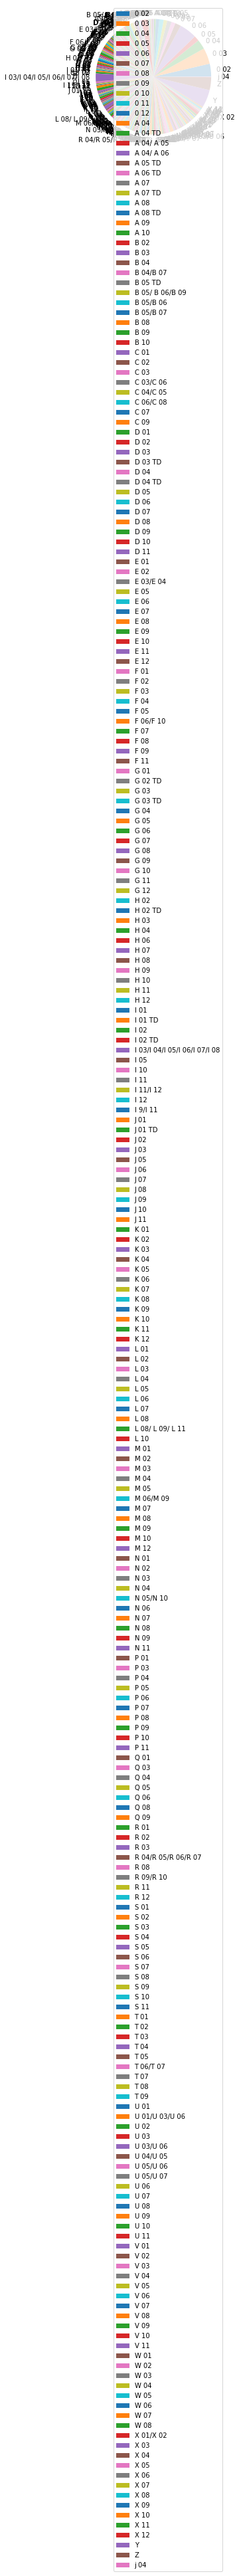

In [102]:
df_cbn.plot.pie(y="total")

In [111]:
data.sort_values(by='date')

,date,CBN
2947567,2018-07-21 04:52:46,0 05
2947568,2018-07-21 04:52:49,0 05
2947569,2018-07-21 04:52:57,0 05
2947570,2018-07-21 04:53:01,0 05
2947571,2018-07-21 04:53:04,0 05
...,...,...
1570859,2019-06-29 21:50:00,S 01
1570860,2019-06-29 21:50:01,E 08
1570861,2019-06-29 21:50:03,S 01
1570862,2019-06-29 21:50:05,S 04
